<h1>Linear Regression on Boston Housing Price</h1>

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [5]:
bos=load_boston()

In [6]:
X = bos.data
Y = bos.target

In [13]:
scalar=preprocessing.StandardScaler()

In [7]:
bos_data=pd.DataFrame(X)

In [8]:
bos_data.columns=bos.feature_names

In [9]:
bos_data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bos_data,Y,test_size=0.33,random_state=6)

In [14]:
X_train=scalar.fit_transform(X_train)

In [17]:
X_test=scalar.transform(X_test)

In [18]:
import warnings
warnings.filterwarnings("ignore")

<h1>Sklearn SGD implementation</h1>

__for alpha=0.0001 and n_iter=100 and eta=0.01__<br>
__alpha:- Constant that multiplies the regularization term. Defaults to 0.0001 __<br>
__ n_iter:- Number of iterations with no improvement to wait before early stopping.__<br>
__eta :- learning_rate__
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
clf = SGDRegressor(alpha=0.0001,n_iter=100,eta0=0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
error_100=mean_squared_error(y_test, y_pred)

In [20]:
clf.coef_

array([-0.6532897 ,  1.01312006, -0.401766  ,  0.66832809, -1.61719875,
        2.49550694, -0.11847322, -3.30790785,  2.46688552, -2.22281505,
       -2.06773426,  0.82506525, -3.65587934])

In [21]:
len(y_pred)

167

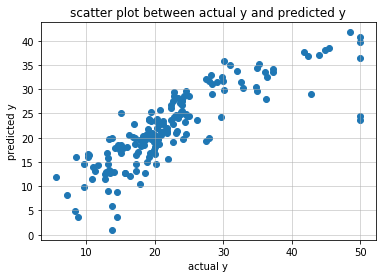

-----------------------------------------------------


In [22]:
plt.scatter(y_test,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-----------------------------------------------------')

**OBSERVATION**<br>
__from above graph you can see that most of values are predicted correctly __<br>
__ except some values__

In [23]:
print(error_100)

26.590385569279555


aBOVE error is mean squared error

__For alpha=0.0001 and n_iter=1000 and eta=0.01__

In [24]:
clf = SGDRegressor(alpha=0.0001,n_iter=1000,eta0=0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
error1=mean_squared_error(y_test, y_pred)

In [25]:
clf.coef_

array([-0.68701814,  1.03372051, -0.33146296,  0.65491821, -1.64214491,
        2.47822998, -0.10825921, -3.31692227,  2.6859687 , -2.4635729 ,
       -2.08342196,  0.81429048, -3.66810295])

In [26]:
len(y_pred)

167

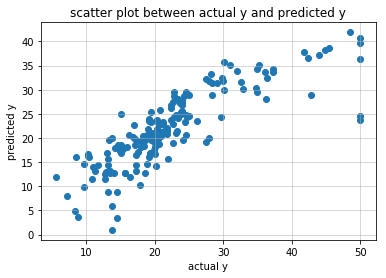

-----------------------------------------------------


In [27]:
plt.scatter(y_test,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-----------------------------------------------------')

In [28]:
print(error1)

26.621146535672167


__When we compare both of our model one with n_itr=100 and another<br>
with n_iter=1000 we can see that mean squared error is nearly same for both__<br>

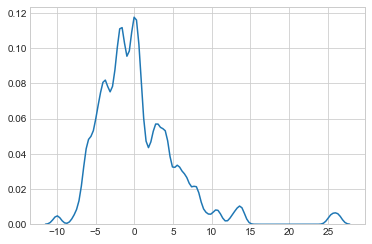

In [29]:
delta_y = y_test - y_pred;
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)

plt.show()

__KDE PLot generally tells about the PDF<br> 
from above graph it is seen that highest peak is at 0 which is good<br> 
Graph performs bad for -ve point but it performs good for +ve points__<br>

In [30]:
weight_actual=clf.coef_

In [31]:
weight_actual=list(weight_actual)

In [32]:
weight_actual[0:5]

[-0.6870181445906263,
 1.0337205124906286,
 -0.33146296159248617,
 0.6549182136858445,
 -1.642144913594435]

<h1> MANNUAL SGD</h1>

In [33]:
manual_train=pd.DataFrame(data=X_train)
manual_train['price']=y_train

In [34]:
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, n_iter=1000):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
       
        t+=1
        
    return w_new, b_new


In [35]:
w,b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)

In [36]:
b

array([22.77173996])

In [37]:
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [38]:
y_pred_manual=pred(np.array(X_test),w,b)

In [39]:
y_pred_manual=list(y_pred_manual)

In [40]:
y_pred_manual[0:5]

[25.843656622856763,
 25.397201637357764,
 29.960802743136068,
 24.039562865596835,
 19.822291609170843]

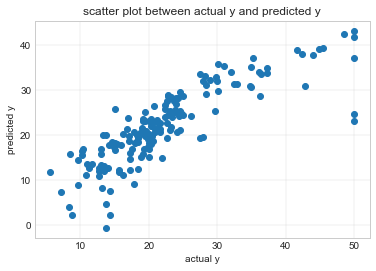

**************************************************************


In [41]:
 plt.scatter(y_test,y_pred_manual)
plt.grid(b=True, linewidth=0.3)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()
print('**************************************************************')

In [42]:
mean_error=[]
for i in range(len(y_test)):
    mean_error.append((y_test[i]-y_pred_manual[i]))

In [43]:
sum1=0
for i in range(len(mean_error)):
    sum1=sum1+((mean_error[i])**2)
final_error=(sum1)/len(mean_error)

In [44]:
final_error

26.571115185626212

In [45]:
data = pd.DataFrame({'y_manual_diff':mean_error, 'y_sklearn_diff':delta_y} )
data.head(2)

,y_manual_diff,y_sklearn_diff
0,-10.843657,-9.969437
1,-2.297202,-1.613594


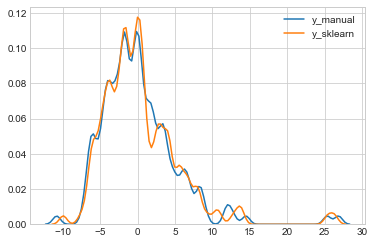

In [46]:
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(data['y_manual_diff']), bw=0.5,label='y_manual')
sns.kdeplot(np.array(data['y_sklearn_diff']),bw=0.5,label='y_sklearn')

plt.show()

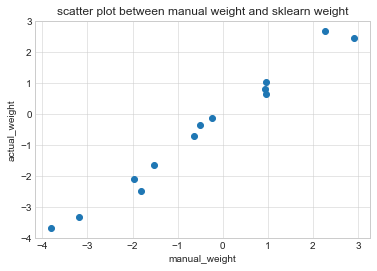

-----------------------------------------------------


In [47]:
plt.scatter(w,weight_actual)
plt.title('scatter plot between manual weight and sklearn weight')
plt.xlabel('manual_weight')
plt.ylabel('actual_weight')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-----------------------------------------------------')

__from below example we will understand that for higher n_iter our both manual and<br>
sklearn SGDReggressor error is almost same but for lower iteration there is diff __

In [48]:
w_100,b_100=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
b_100

array([19.84386906])

In [49]:
def pred(x,w_100, b_100):
    y_pred_100=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w_100,x[i])+b_100)
        y_pred_100.append(y)
    return np.array(y_pred_100)

In [50]:
y_pred_manual_100=pred(np.array(X_test),w_100,b_100)

In [51]:
y_pred_manual_100=list(y_pred_manual_100)

In [52]:
y_pred_manual_100[0:5]

[23.443133262756056,
 21.81362149619836,
 26.215457332205965,
 21.761073939044262,
 15.761996601199247]

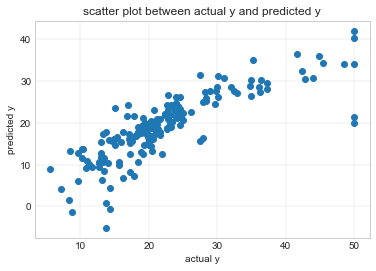

**************************************************************


In [53]:
 plt.scatter(y_test,y_pred_manual_100)
plt.grid(b=True, linewidth=0.3)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()
print('**************************************************************')

In [54]:
mean_error=[]
for i in range(len(y_test)):
    mean_error.append((y_test[i]-y_pred_manual_100[i]))

In [55]:
sum1=0
for i in range(len(mean_error)):
    sum1=sum1+((mean_error[i])**2)
final_error_100=(sum1)/len(mean_error)

In [56]:
final_error_100

38.719936950843426

In [57]:
data = pd.DataFrame({'y_manual_diff':mean_error, 'y_sklearn_diff':delta_y} )
data.head(2)

,y_manual_diff,y_sklearn_diff
0,-8.443133,-9.969437
1,1.286379,-1.613594


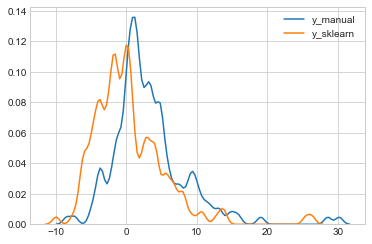

In [58]:
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(data['y_manual_diff']), bw=0.5,label='y_manual')
sns.kdeplot(np.array(data['y_sklearn_diff']),bw=0.5,label='y_sklearn')

plt.show()

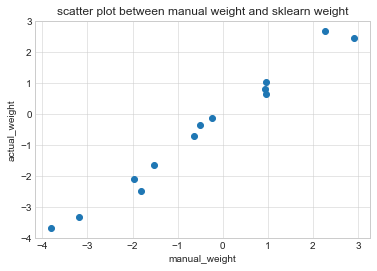

-----------------------------------------------------


In [59]:
plt.scatter(w,weight_actual)
plt.title('scatter plot between manual weight and sklearn weight')
plt.xlabel('manual_weight')
plt.ylabel('actual_weight')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-----------------------------------------------------')

__CONCLUSION__

In [60]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector manual','Weight vector SGD sklearn']
for i in range(13):
    x.add_row([w[0][i],weight_actual[i]])
print(x)

+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -0.6387900674902751  |    -0.6870181445906263    |
|  0.9647979489790537  |     1.0337205124906286    |
| -0.5137126758953119  |    -0.33146296159248617   |
|  0.9686434184642032  |     0.6549182136858445    |
| -1.5229675364910689  |     -1.642144913594435    |
|  2.9199837791875844  |     2.478229981371889     |
| -0.23951506080900944 |    -0.10825920649889233   |
| -3.1959027116298064  |    -3.3169222722807468    |
|  2.2629081920149594  |     2.685968699318519     |
| -1.8231163490954958  |    -2.4635728999674247    |
| -1.9745147858978296  |    -2.0834219560594565    |
|  0.938912821126531   |     0.8142904764203849    |
| -3.8123696169183563  |     -3.66810294945099     |
+----------------------+---------------------------+


In [62]:
x = PrettyTable()
x.field_names=['MSE_mannual','MSE_SGD sklearn','learning_Rate','n_iter']
x.add_row([final_error_100,error_100,'0.01','100'])
x.add_row([final_error,error1,'0.01','1000'])

print(x)    


+--------------------+--------------------+---------------+--------+
|    MSE_mannual     |  MSE_SGD sklearn   | learning_Rate | n_iter |
+--------------------+--------------------+---------------+--------+
| 38.719936950843426 | 26.590385569279555 |      0.01     |  100   |
| 26.571115185626212 | 26.621146535672167 |      0.01     |  1000  |
+--------------------+--------------------+---------------+--------+


__OBSERVATION__

1. WE IMPLEMENT SGD REGRESSOR MANNUALY AND WITH SKLEARN
2. WE COMPARE OUR MODEL WITH PRETTY TABLE 
3. WE FOUND THAT BOTH MANUAL AND SKLEARN SGD REGRESSOR PERFOMS NEARLY SAME FOR HIGHER ITERATION 
4. FOR LOWER ITERATION THERE IS DIFF IN MSE.
5. SGDReggressor performs well on Boston Housing price we see using PDF.

**END**